In [83]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import plotly.io as pio
import seaborn as sns

pio.templates.default = "plotly_white"
from sklearn.compose import make_column_transformer
import ast
from sklearn.preprocessing import OrdinalEncoder
from sklearn.preprocessing import PowerTransformer
from scipy.stats.mstats import winsorize
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import VotingClassifier
from sklearn.model_selection import learning_curve
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import classification_report
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.ensemble import StackingClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, roc_auc_score
from sklearn.model_selection import cross_val_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import auc
from sklearn.neural_network import MLPClassifier
from imblearn.over_sampling import SMOTE
from imblearn.pipeline import make_pipeline
from imblearn.combine import SMOTEENN
from sklearn.metrics import (precision_recall_curve)
import warnings
warnings.filterwarnings('ignore')

# Reading CSV File

In [84]:
# Read Excel file
air_quality = pd.read_csv('data_2/air_data.csv')
#air_quality = pd.read_excel('target/air_quality.xlsx')

# View first 20 rows of the dataset
air_quality.head(20)

,date,pm25,pm10,o3,no2,so2,co,city,coordinates
0,1/1/2014,,302,5,33,5,20,AV-Delhi,"[28.6508,77.3152]"
1,1/1/2014,,199,20,45,4,15,RKP-Delhi,"[28.5648,77.1744]"
2,1/1/2014,,196,30,11,9,19,MM-Delhi,"[28.6341,77.2005]"
3,1/2/2014,328,308,5,45,22,29,AV-Delhi,"[28.6508,77.3152]"
4,1/2/2014,311,181,42,14,5,22,MM-Delhi,"[28.6341,77.2005]"
5,1/2/2014,268,194,38,49,4,18,RKP-Delhi,"[28.5648,77.1744]"
6,1/3/2014,266,253,37,63,7,29,RKP-Delhi,"[28.5648,77.1744]"
7,1/3/2014,262,188,48,13,7,28,MM-Delhi,"[28.6341,77.2005]"
8,1/3/2014,278,567,4,63,8,44,AV-Delhi,"[28.6508,77.3152]"
9,1/4/2014,340,711,5,34,8,40,AV-Delhi,"[28.6508,77.3152]"


In [85]:
# Read last 20 rows of air quality dataset
air_quality.tail(20)

,date,pm25,pm10,o3,no2,so2,co,city,coordinates
15427,4/8/2024,143,90,30,14,3,6,DCNS-Delhi,"[28.612498,77.237388]"
15428,4/8/2024,111,81,2,22,,4,MM-Delhi,"[28.6341,77.2005]"
15429,4/8/2024,144,118,13,22,3,8,Pusa-Delhi,"[28.636997, 77.172248]"
15430,4/8/2024,162,123,5,31,11,13,RKP-Delhi,"[28.5648,77.1744]"
15431,4/8/2024,159,296,14,25,3,8,AV-Delhi,"[28.6508,77.3152]"
15432,4/9/2024,149,125,84,32,7,13,RKP-Delhi,"[28.5648,77.1744]"
15433,4/9/2024,135,98,40,14,2,7,DCNS-Delhi,"[28.612498,77.237388]"
15434,4/9/2024,124,81,7,21,,6,MM-Delhi,"[28.6341,77.2005]"
15435,4/9/2024,129,112,20,26,3,8,Pusa-Delhi,"[28.636997, 77.172248]"
15436,4/9/2024,243,285,24,24,5,19,AV-Delhi,"[28.6508,77.3152]"


# Data Preprocessing

In [86]:
# check structure
air_quality.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15447 entries, 0 to 15446
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   date         15447 non-null  object
 1   pm25         15447 non-null  object
 2   pm10         15447 non-null  object
 3   o3           15447 non-null  object
 4   no2          15447 non-null  object
 5   so2          15447 non-null  object
 6   co           15447 non-null  object
 7   city         15447 non-null  object
 8   coordinates  15447 non-null  object
dtypes: object(9)
memory usage: 1.1+ MB


In [87]:
# 'coordinates' column contains strings like "[latitude, longitude]"
air_quality['coordinates'] = air_quality['coordinates'].apply(ast.literal_eval)

# Separate 'coordinates' column into 'latitude' and 'longitude'
air_quality[['latitude', 'longitude']] = pd.DataFrame(air_quality['coordinates'].tolist(), index=air_quality.index)

# Drop the original 'coordinates' column
air_quality = air_quality.drop('coordinates', axis=1)

# convert numeric columns to the appropriate data type
numeric_columns = ['pm25', 'pm10', 'o3', 'no2', 'so2', 'co', 'latitude', 'longitude']

for col in numeric_columns:
    air_quality[col] = pd.to_numeric(air_quality[col], errors='coerce')

# Convert 'date' column to datetime format
air_quality['date'] = pd.to_datetime(air_quality['date'])

# Display the data types after conversion
print(air_quality.dtypes)

date         datetime64[ns]
pm25                float64
pm10                float64
o3                  float64
no2                 float64
so2                 float64
co                  float64
city                 object
latitude            float64
longitude           float64
dtype: object


In [88]:
# info
air_quality.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15447 entries, 0 to 15446
Data columns (total 10 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   date       15447 non-null  datetime64[ns]
 1   pm25       14998 non-null  float64       
 2   pm10       15109 non-null  float64       
 3   o3         15065 non-null  float64       
 4   no2        15085 non-null  float64       
 5   so2        14597 non-null  float64       
 6   co         14737 non-null  float64       
 7   city       15447 non-null  object        
 8   latitude   15447 non-null  float64       
 9   longitude  15447 non-null  float64       
dtypes: datetime64[ns](1), float64(8), object(1)
memory usage: 1.2+ MB


# Exploratory Data Analysis (EDA)

In [89]:
# descriptive analysis
air_quality.describe(include= "all")

,date,pm25,pm10,o3,no2,so2,co,city,latitude,longitude
count,15447,14998.000000,15109.000000,15065.000000,15085.000000,14597.000000,14737.000000,15447,15447.000000,15447.000000
unique,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5,NaN,NaN
top,NaN,NaN,NaN,NaN,NaN,NaN,NaN,RKP-Delhi,NaN,NaN
freq,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3698,NaN,NaN
mean,2019-10-11 05:03:48.626917888,180.152754,166.196704,25.744773,26.469274,6.921696,13.177716,NaN,28.618611,77.221861
min,2014-01-01 00:00:00,17.000000,5.000000,1.000000,1.000000,1.000000,1.000000,NaN,28.564800,77.172248
25%,2017-10-01 00:00:00,126.000000,85.000000,10.000000,15.000000,3.000000,7.000000,NaN,28.612498,77.174400
50%,2020-01-01 00:00:00,164.000000,129.000000,19.000000,23.000000,6.000000,11.000000,NaN,28.634100,77.200500
75%,2022-02-21 00:00:00,216.000000,201.000000,34.000000,34.000000,9.000000,16.000000,NaN,28.636997,77.237388
max,2024-04-11 00:00:00,999.000000,999.000000,350.000000,250.000000,479.000000,476.000000,NaN,28.650800,77.315200


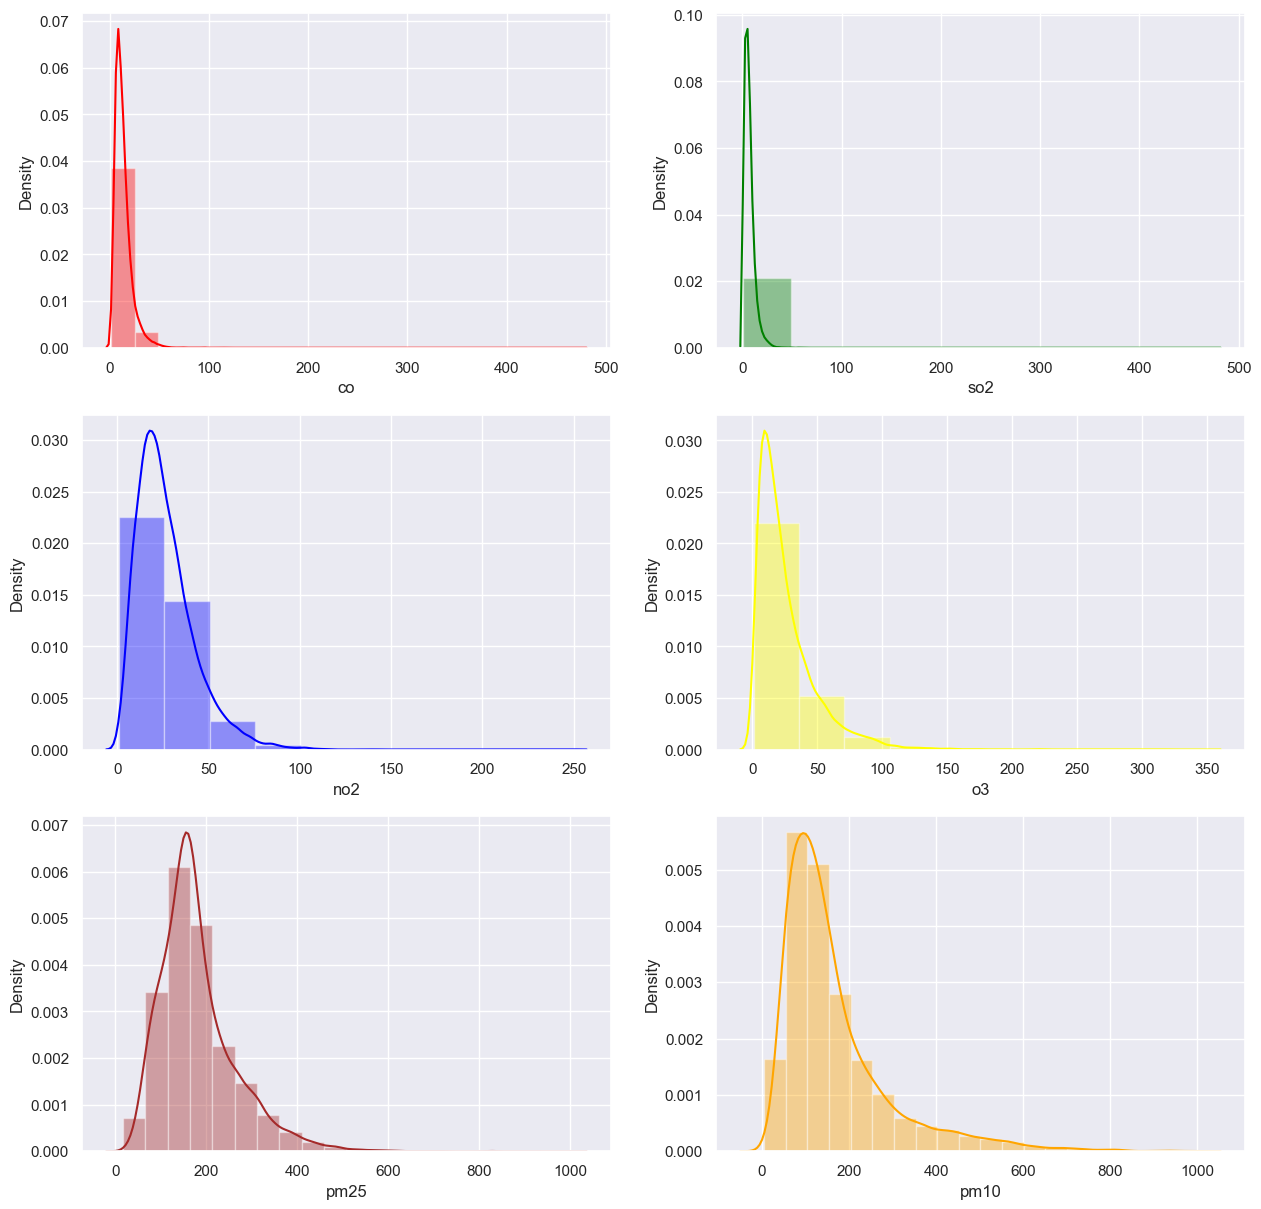

In [191]:
# To check the distribution of dataset
plt.figure(figsize=(15,20))
plt.subplot(4,2,1)
sns.distplot(air_quality['co'],bins = 20,color = 'red')
plt.subplot(4,2,2)
sns.distplot(air_quality['so2'],bins = 10,color = 'green')
plt.subplot(4,2,3)
sns.distplot(air_quality['no2'],bins = 10,color = 'blue')
plt.subplot(4,2,4)
sns.distplot(air_quality['o3'],bins = 10, color = 'yellow')
plt.subplot(4,2,5)
sns.distplot(air_quality['pm25'],bins = 20,color = 'brown')
plt.subplot(4,2,6)
sns.distplot(air_quality['pm10'],bins = 20,color = 'orange')
plt.show()

In [91]:
    
#Assuming 'date' column is in datetime format
air_quality['year'] = air_quality['date'].dt.year


In [92]:
# copy dataset
aq_aqi = air_quality.copy()
aq_aqi.head()

,date,pm25,pm10,o3,no2,so2,co,city,latitude,longitude,year
0,2014-01-01,NaN,302.0,5.0,33.0,5.0,20.0,AV-Delhi,28.6508,77.3152,2014
1,2014-01-01,NaN,199.0,20.0,45.0,4.0,15.0,RKP-Delhi,28.5648,77.1744,2014
2,2014-01-01,NaN,196.0,30.0,11.0,9.0,19.0,MM-Delhi,28.6341,77.2005,2014
3,2014-01-02,328.0,308.0,5.0,45.0,22.0,29.0,AV-Delhi,28.6508,77.3152,2014
4,2014-01-02,311.0,181.0,42.0,14.0,5.0,22.0,MM-Delhi,28.6341,77.2005,2014


# Missing Values

In [93]:
# Check missing Values
aq_aqi.isna().sum()

date           0
pm25         449
pm10         338
o3           382
no2          362
so2          850
co           710
city           0
latitude       0
longitude      0
year           0
dtype: int64

In [94]:
# Drop missing values
aq_df = aq_aqi.dropna()


In [95]:
# check missing values after dropping
aq_df.isna().sum()

date         0
pm25         0
pm10         0
o3           0
no2          0
so2          0
co           0
city         0
latitude     0
longitude    0
year         0
dtype: int64

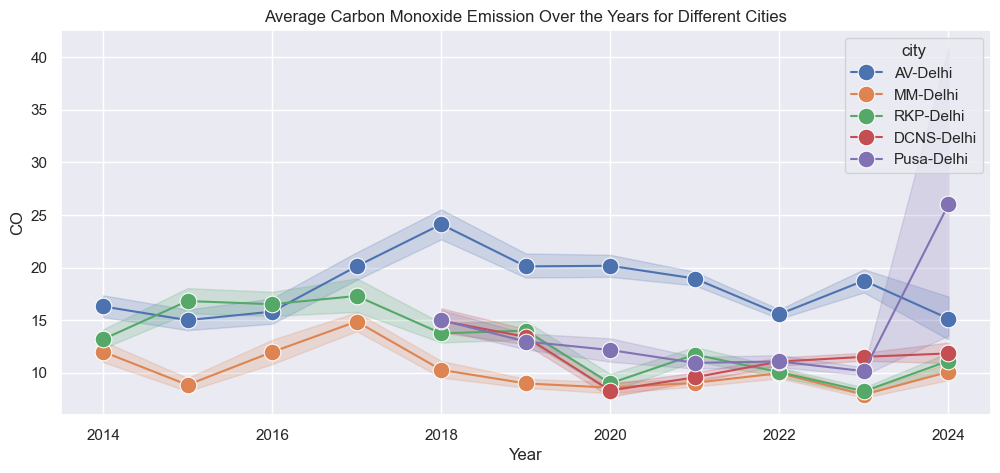

In [96]:
# carbon monoxide emission
sns.set(style="darkgrid")
plt.figure(figsize=(12, 5))

# Use Seaborn's lineplot with 'hue' for different cities
sns.lineplot(data=aq_df, x='year', y='co', hue='city', marker='o', markersize=12)

# Adding labels and title
plt.xlabel('Year')
plt.ylabel('CO')
plt.title('Average Carbon Monoxide Emission Over the Years for Different Cities')

# Show the plot
plt.show()

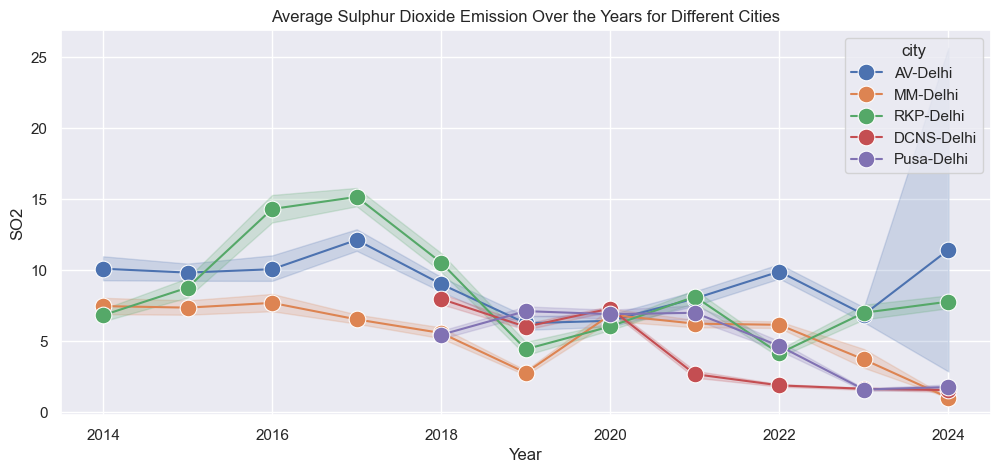

In [97]:
# Sulphur Dioxide Emission
sns.set(style="darkgrid")
plt.figure(figsize=(12, 5))

# Use Seaborn's lineplot with 'hue' for different cities
sns.lineplot(data=aq_df, x='year', y='so2', hue='city', marker='o', markersize=12)

# Adding labels and title
plt.xlabel('Year')
plt.ylabel('SO2')
plt.title('Average Sulphur Dioxide Emission Over the Years for Different Cities')

# Show the plot
plt.show()

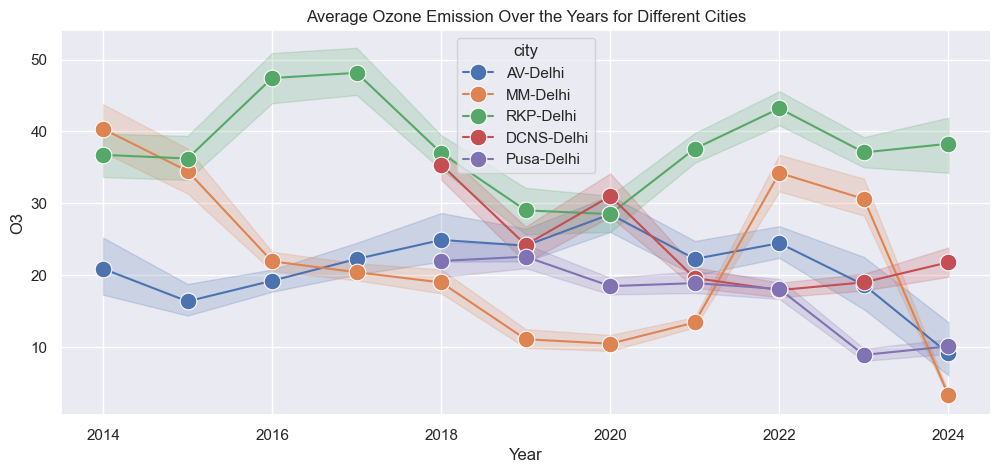

In [98]:
# Ozone Emission
sns.set(style="darkgrid")
plt.figure(figsize=(12, 5))

# Use Seaborn's lineplot with 'hue' for different cities
sns.lineplot(data=aq_df, x='year', y='o3', hue='city', marker='o', markersize=12)

# Adding labels and title
plt.xlabel('Year')
plt.ylabel('O3')
plt.title('Average Ozone Emission Over the Years for Different Cities')

# Show the plot
plt.show()

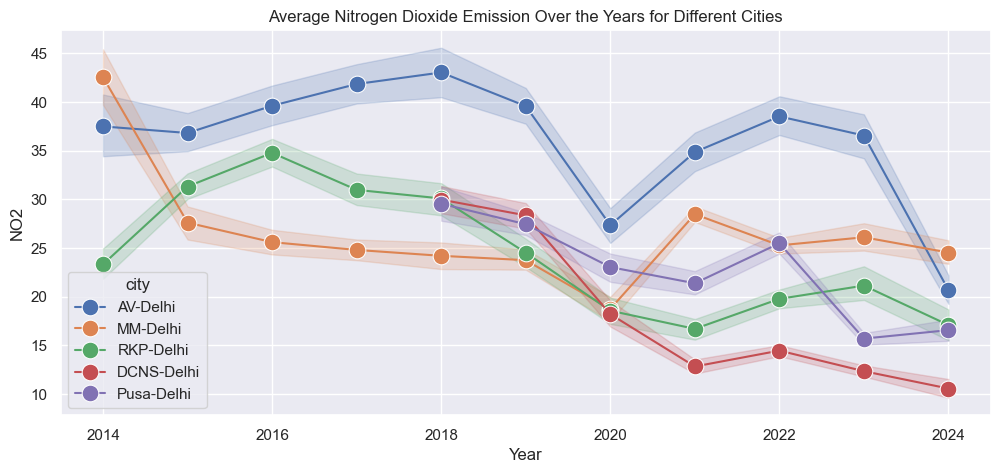

In [99]:
# Nitrogen Dioxide Emission
sns.set(style="darkgrid")
plt.figure(figsize=(12, 5))

# Use Seaborn's lineplot with 'hue' for different cities
sns.lineplot(data=aq_df, x='year', y='no2', hue='city', marker='o', markersize=12)

# Adding labels and title
plt.xlabel('Year')
plt.ylabel('NO2')
plt.title('Average Nitrogen Dioxide Emission Over the Years for Different Cities')

# Show the plot
plt.show()

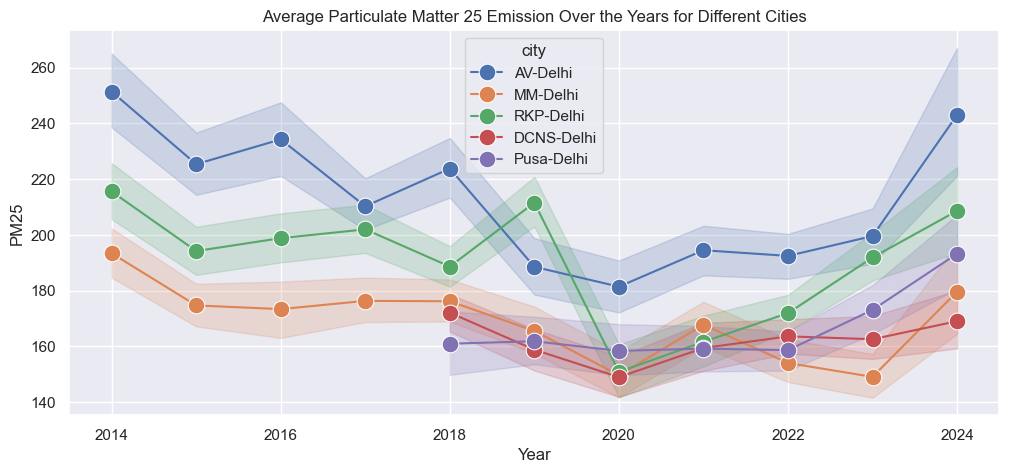

In [100]:
# Particulate Matter 25 Emission
sns.set(style="darkgrid")
plt.figure(figsize=(12, 5))

# Use Seaborn's lineplot with 'hue' for different cities
sns.lineplot(data=aq_df, x='year', y='pm25', hue='city', marker='o', markersize=12)

# Adding labels and title
plt.xlabel('Year')
plt.ylabel('PM25')
plt.title('Average Particulate Matter 25 Emission Over the Years for Different Cities')

# Show the plot
plt.show()

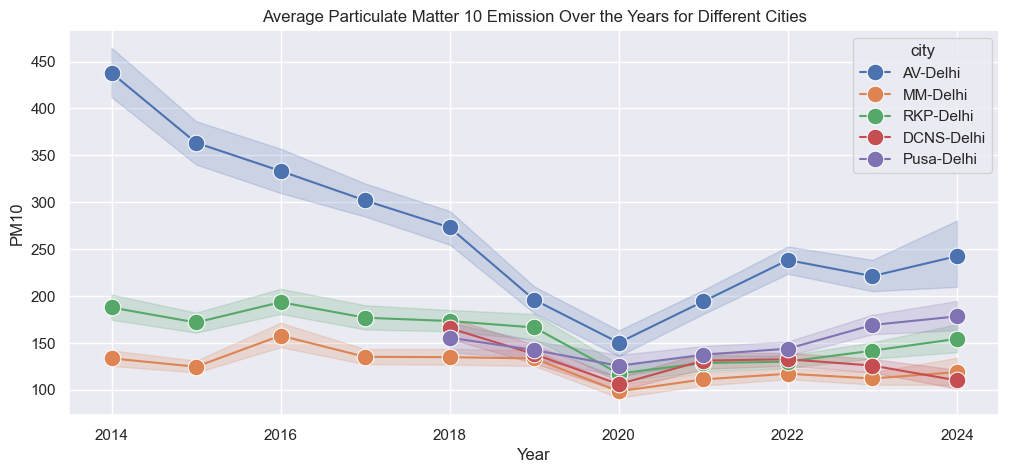

In [101]:
# Particulate Matter 10 Emission
#sns.set(style="darkgrid")
plt.figure(figsize=(12, 5))

# Use Seaborn's lineplot with 'hue' for different cities
sns.lineplot(data=aq_df, x='year', y='pm10', hue='city', marker='o', markersize=12)

# Adding labels and title
plt.xlabel('Year')
plt.ylabel('PM10')
plt.title('Average Particulate Matter 10 Emission Over the Years for Different Cities')

# Show the plot
plt.show()

# Removing Outliers

<Axes: >

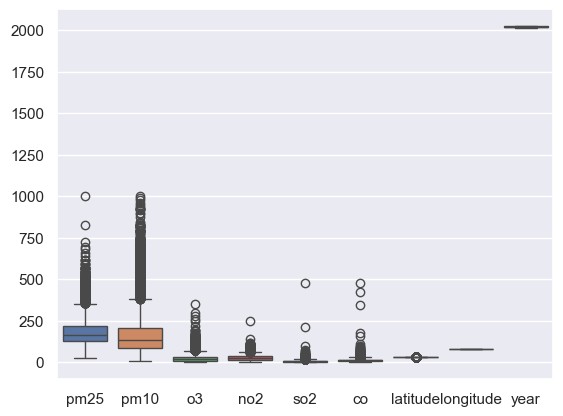

In [102]:
# boxplot
sns.boxplot(aq_df)


<Axes: ylabel='so2'>

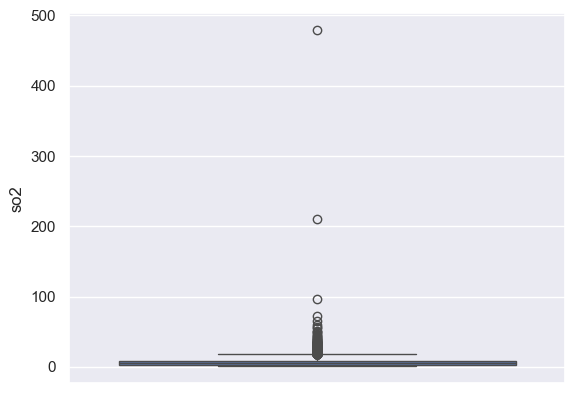

In [103]:
# Checking outliers
sns.boxplot(aq_df.so2)

<Axes: ylabel='so2'>

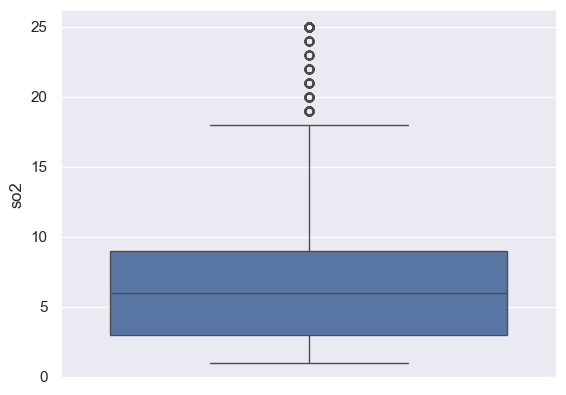

In [104]:
aq_df['so2'] = winsorize(aq_df['so2'], limits= [0.01,0.01])
# check outliers 
sns.boxplot(aq_df['so2'])

<Axes: ylabel='no2'>

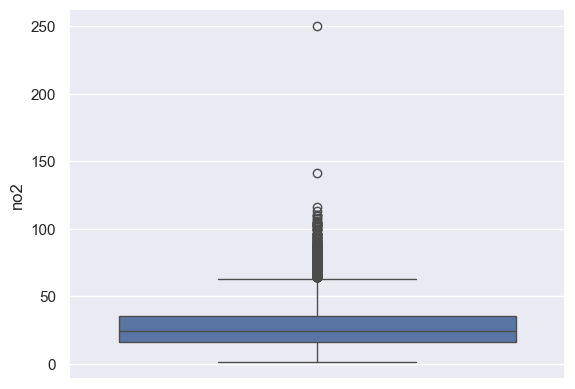

In [105]:
# Checking outliers
sns.boxplot(aq_df.no2)

<Axes: ylabel='no2'>

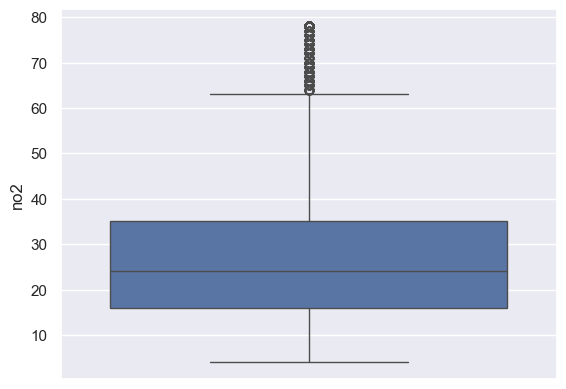

In [106]:
aq_df['no2'] = winsorize(aq_df['no2'], limits= [0.01,0.01])
# check outliers 
sns.boxplot(aq_df['no2'])

<Axes: ylabel='co'>

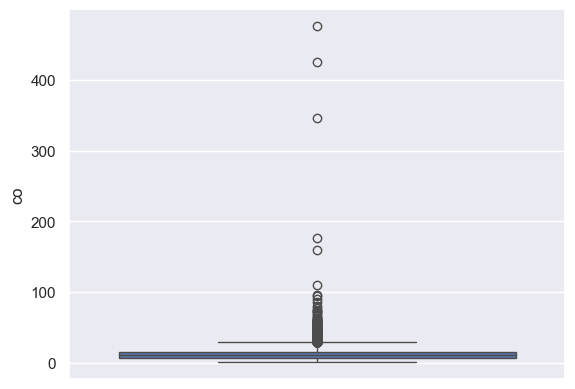

In [107]:
# Checking outliers
sns.boxplot(aq_df.co)

<Axes: ylabel='co'>

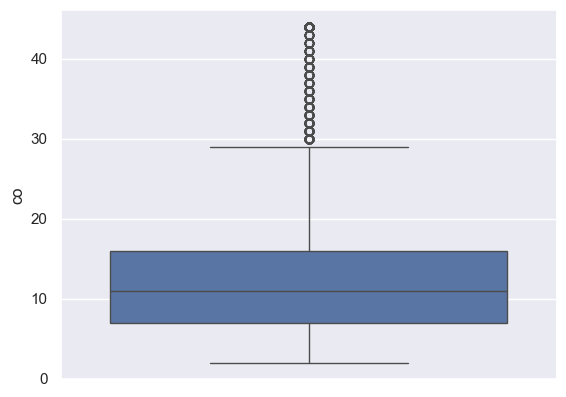

In [108]:
aq_df['co'] = winsorize(aq_df['co'], limits= [0.01,0.01])
# check outliers 
sns.boxplot(aq_df['co'])

<Axes: ylabel='o3'>

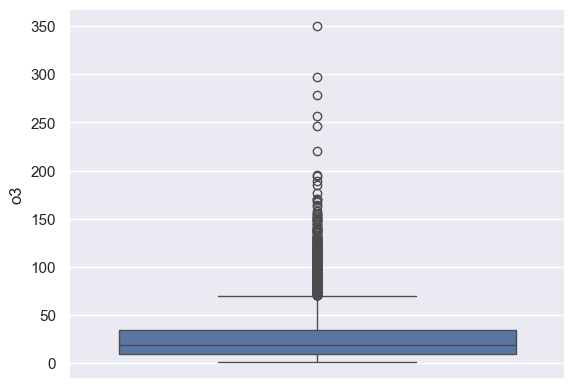

In [109]:
sns.boxplot(aq_df.o3)

<Axes: ylabel='o3'>

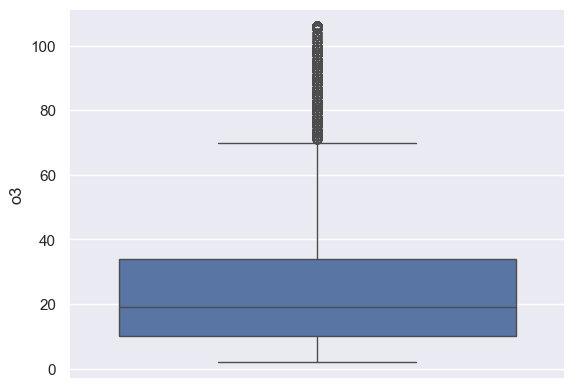

In [110]:
aq_df['o3'] = winsorize(aq_df['o3'], limits= [0.01,0.01])
# check outliers 
sns.boxplot(aq_df['o3'])

<Axes: ylabel='pm10'>

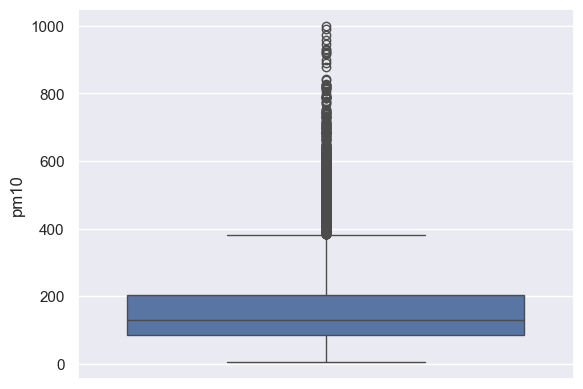

In [111]:
# checking outliers
sns.boxplot(aq_df.pm10)

<Axes: ylabel='pm10'>

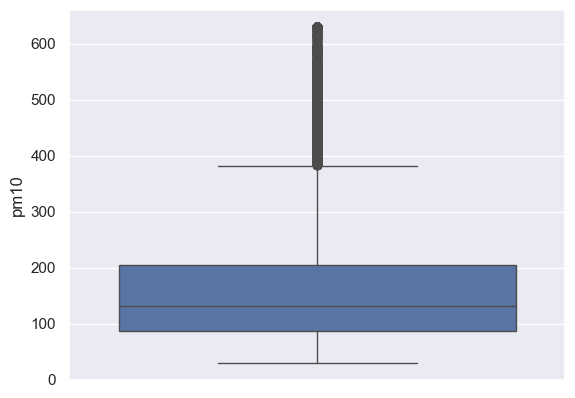

In [112]:
aq_df['pm10'] = winsorize(aq_df['pm10'], limits= [0.01,0.01])
# check outliers 
sns.boxplot(aq_df['pm10'])

<Axes: ylabel='pm25'>

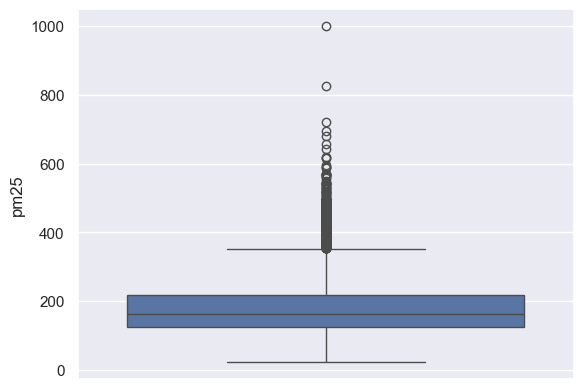

In [113]:
# checking outliers
sns.boxplot(aq_df.pm25)

<Axes: ylabel='pm25'>

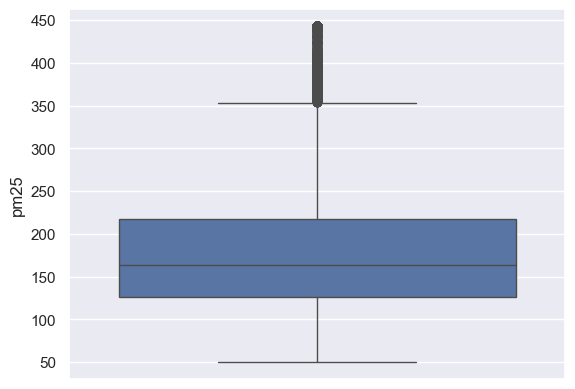

In [114]:
aq_df['pm25'] = winsorize(aq_df['pm25'], limits= [0.01,0.01])
# check outliers 
sns.boxplot(aq_df['pm25'])

<Axes: >

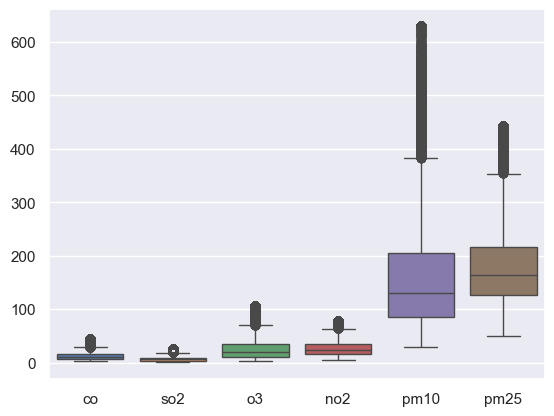

In [115]:
# boxplot
sns.boxplot(aq_df[['co', 'so2', 'o3', 'no2', 'pm10', 'pm25']])

In [116]:
# Check for null values
aq_df.isnull().sum()

date         0
pm25         0
pm10         0
o3           0
no2          0
so2          0
co           0
city         0
latitude     0
longitude    0
year         0
dtype: int64

In [117]:
# check for duplicate values
aq_df.duplicated().sum()

0

In [118]:
aq_df

,date,pm25,pm10,o3,no2,so2,co,city,latitude,longitude,year
3,2014-01-02,328.0,308.0,5.0,45.0,22.0,29.0,AV-Delhi,28.650800,77.315200,2014
4,2014-01-02,311.0,181.0,42.0,14.0,5.0,22.0,MM-Delhi,28.634100,77.200500,2014
5,2014-01-02,268.0,194.0,38.0,49.0,4.0,18.0,RKP-Delhi,28.564800,77.174400,2014
6,2014-01-03,266.0,253.0,37.0,63.0,7.0,29.0,RKP-Delhi,28.564800,77.174400,2014
7,2014-01-03,262.0,188.0,48.0,13.0,7.0,28.0,MM-Delhi,28.634100,77.200500,2014
...,...,...,...,...,...,...,...,...,...,...,...
15437,2024-04-10,132.0,106.0,3.0,21.0,1.0,8.0,MM-Delhi,28.634100,77.200500,2024
15438,2024-04-10,238.0,271.0,35.0,20.0,5.0,25.0,AV-Delhi,28.650800,77.315200,2024
15439,2024-04-10,138.0,129.0,27.0,21.0,3.0,7.0,Pusa-Delhi,28.636997,77.172248,2024
15440,2024-04-10,151.0,195.0,106.0,35.0,9.0,17.0,RKP-Delhi,28.564800,77.174400,2024


In [119]:
aq_df.describe()

,date,pm25,pm10,o3,no2,so2,co,latitude,longitude,year
count,13631,13631.000000,13631.000000,13631.000000,13631.000000,13631.000000,13631.000000,13631.000000,13631.000000,13631.000000
mean,2019-10-31 11:25:24.143496448,179.518524,166.842858,25.643020,26.715648,6.809112,13.068153,28.618325,77.221996,2019.338933
min,2014-01-02 00:00:00,50.000000,30.000000,2.000000,4.000000,1.000000,2.000000,28.564800,77.172248,2014.000000
25%,2017-10-27 00:00:00,126.000000,86.000000,10.000000,16.000000,3.000000,7.000000,28.612498,77.174400,2017.000000
50%,2020-02-08 00:00:00,164.000000,131.000000,19.000000,24.000000,6.000000,11.000000,28.634100,77.200500,2020.000000
75%,2022-02-21 00:00:00,217.000000,204.500000,34.000000,35.000000,9.000000,16.000000,28.636997,77.237388,2022.000000
max,2024-04-10 00:00:00,443.000000,630.000000,106.000000,78.000000,25.000000,44.000000,28.650800,77.315200,2024.000000
std,NaN,80.112012,120.362694,21.513211,15.351504,4.873117,8.082796,0.032139,0.054611,2.773210


# Calculate Air Quality Index

In [120]:
# Breakpoints for pollutant AQI calculation
pm10_breakpoints = {
    'c_low': [0, 50, 101, 251, 351, 431, 501, 601],
    'c_high': [50, 100, 250, 350, 430, 500, 600, 999.0],
    'aqi_low': [0, 51, 101, 201, 301, 401, 501, 601],
    'aqi_high': [50, 100, 200, 300, 400, 500, 600, 999]
}

# AQI calculation function for PM10
def calculate_aqi_pm10(value):
    for i in range(len(pm10_breakpoints['c_low'])):
        if pm10_breakpoints['c_low'][i] <= value <= pm10_breakpoints['c_high'][i]:
            c_low = pm10_breakpoints['c_low'][i]
            c_high = pm10_breakpoints['c_high'][i]
            aqi_low = pm10_breakpoints['aqi_low'][i]
            aqi_high = pm10_breakpoints['aqi_high'][i]
            break
        
            
    aqi_pm10 = (aqi_high - aqi_low) / (c_high - c_low) * (value - c_low) + aqi_low
    return int(round(aqi_pm10))

# Create a new column 'aqi_pm10' and apply the AQI calculation function
aq_df['aqi_pm10'] = aq_df['pm10'].apply(calculate_aqi_pm10)


In [121]:
no2_breakpoints = {
    'c_low_no2': [0, 41, 81, 181, 281, 401],
    'c_high_no2': [40, 80, 180, 280, 400, 500],
    'aqi_low_no2': [0, 51, 101, 201, 301, 401],
    'aqi_high_no2': [50, 100, 200, 300, 400, 500]
}
# AQI calculation function for PM10
def calculate_aqi_no2(value):
    for i in range(len(no2_breakpoints['c_low_no2'])):
        if no2_breakpoints['c_low_no2'][i] <= value <= no2_breakpoints['c_high_no2'][i]:
            c_low_no2 = no2_breakpoints['c_low_no2'][i]
            c_high_no2 = no2_breakpoints['c_high_no2'][i]
            aqi_low_no2 = no2_breakpoints['aqi_low_no2'][i]
            aqi_high_no2 = no2_breakpoints['aqi_high_no2'][i]
            break

    aqi_no2 = (aqi_high_no2 - aqi_low_no2) / (c_high_no2 - c_low_no2) * (value - c_low_no2) + aqi_low_no2
    return int(round(aqi_no2))

# Create a new column 'aqi_pm10' and apply the AQI calculation function
aq_df['aqi_no2'] = aq_df['no2'].apply(calculate_aqi_no2)

In [122]:
pm25_breakpoints = {
    'c_low_pm25': [0, 31, 61, 91, 121, 251, 351],
    'c_high_pm25': [30, 60, 90, 120, 250, 350, 500],
    'aqi_low_pm25': [0, 51, 101, 201, 301, 401, 401],
    'aqi_high_pm25': [50, 100, 200, 300, 400, 500, 500]
}

# AQI calculation function for PM10
def calculate_aqi_pm25(value):
    for i in range(len(pm25_breakpoints['c_low_pm25'])):
        if pm25_breakpoints['c_low_pm25'][i] <= value <= pm25_breakpoints['c_high_pm25'][i]:
            c_low_pm25 = pm25_breakpoints['c_low_pm25'][i]
            c_high_pm25 = pm25_breakpoints['c_high_pm25'][i]
            aqi_low_pm25 = pm25_breakpoints['aqi_low_pm25'][i]
            aqi_high_pm25 = pm25_breakpoints['aqi_high_pm25'][i]
            break

    aqi_pm25 = (aqi_high_pm25 - aqi_low_pm25) / (c_high_pm25 - c_low_pm25) * (value - c_low_pm25) + aqi_low_pm25
    return int(round(aqi_pm25))


# Create a new column 'aqi_pm10' and apply the AQI calculation function
aq_df['aqi_pm25'] = aq_df['pm25'].apply(calculate_aqi_pm25)

In [123]:
# Breakpoints for O3 AQI calculation
o3_breakpoints = {
    'c_low': [0, 51, 101, 169, 209, 748, 1009, 1259],
    'c_high': [50, 100, 168, 208, 748, 1008, 1258, 999.0],
    'aqi_low': [0, 51, 101, 201, 301, 401, 501, 601],
    'aqi_high': [50, 100, 200, 300, 400, 500, 600, 999]
}

# AQI calculation function for O3
def calculate_aqi_o3(value):
    for i in range(len(o3_breakpoints['c_low'])):
        if o3_breakpoints['c_low'][i] <= value <= o3_breakpoints['c_high'][i]:
            c_low = o3_breakpoints['c_low'][i]
            c_high = o3_breakpoints['c_high'][i]
            aqi_low = o3_breakpoints['aqi_low'][i]
            aqi_high = o3_breakpoints['aqi_high'][i]
            break

    aqi_o3 = (aqi_high - aqi_low) / (c_high - c_low) * (value - c_low) + aqi_low
    return int(round(aqi_o3))

# Example usage:
aq_df['aqi_o3'] = aq_df['o3'].apply(calculate_aqi_o3)

In [124]:
# Breakpoints for SO2 AQI calculation (Indian Standards)
so2_breakpoints = {
    'c_low': [0, 41, 81, 381, 801, 1601],
    'c_high': [40, 80, 380, 800, 1600, 2000],
    'aqi_low': [0, 51, 101, 201, 301, 401],
    'aqi_high': [50, 100, 200, 300, 400, 500]
}

# AQI calculation function for SO2 (Indian Standards)
def calculate_aqi_so2(value):
    for i in range(len(so2_breakpoints['c_low'])):
        if so2_breakpoints['c_low'][i] <= value <= so2_breakpoints['c_high'][i]:
            c_low = so2_breakpoints['c_low'][i]
            c_high = so2_breakpoints['c_high'][i]
            aqi_low = so2_breakpoints['aqi_low'][i]
            aqi_high = so2_breakpoints['aqi_high'][i]
            break

    aqi_so2 = (aqi_high - aqi_low) / (c_high - c_low) * (value - c_low) + aqi_low
    return int(round(aqi_so2))

# Example usage:
aq_df['aqi_so2'] = aq_df['so2'].apply(calculate_aqi_so2)

In [125]:
# Breakpoints for CO AQI calculation
co_breakpoints = {
    'c_low_co': [0, 1.1, 2.1, 10, 17, 34],
    'c_high_co': [1.0, 2.0, 10, 17, 34, 68],
    'aqi_low_co': [0, 51, 101, 201, 301, 401],
    'aqi_high_co': [50, 100, 200, 300, 400, 500]
}

# AQI calculation function for CO
def calculate_aqi_co(value):
    for i in range(len(co_breakpoints['c_low_co'])):
        if co_breakpoints['c_low_co'][i] <= value <= co_breakpoints['c_high_co'][i]:
            c_low_co = co_breakpoints['c_low_co'][i]
            c_high_co = co_breakpoints['c_high_co'][i]
            aqi_low_co = co_breakpoints['aqi_low_co'][i]
            aqi_high_co = co_breakpoints['aqi_high_co'][i]
            break

    aqi_co = (aqi_high_co - aqi_low_co) / (c_high_co - c_low_co) * (value - c_low_co) + aqi_low_co
    return int(round(aqi_co))

# Example usage:
aq_df['aqi_co'] = aq_df['co'].apply(calculate_aqi_co)

In [126]:
aq_df

,date,pm25,pm10,o3,no2,so2,co,city,latitude,longitude,year,aqi_pm10,aqi_no2,aqi_pm25,aqi_o3,aqi_so2,aqi_co
3,2014-01-02,328.0,308.0,5.0,45.0,22.0,29.0,AV-Delhi,28.650800,77.315200,2014,258,56,478,5,28,371
4,2014-01-02,311.0,181.0,42.0,14.0,5.0,22.0,MM-Delhi,28.634100,77.200500,2014,154,18,461,42,6,330
5,2014-01-02,268.0,194.0,38.0,49.0,4.0,18.0,RKP-Delhi,28.564800,77.174400,2014,163,61,418,38,5,307
6,2014-01-03,266.0,253.0,37.0,63.0,7.0,29.0,RKP-Delhi,28.564800,77.174400,2014,203,79,416,37,9,371
7,2014-01-03,262.0,188.0,48.0,13.0,7.0,28.0,MM-Delhi,28.634100,77.200500,2014,159,16,412,48,9,365
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15437,2024-04-10,132.0,106.0,3.0,21.0,1.0,8.0,MM-Delhi,28.634100,77.200500,2024,104,26,309,3,1,175
15438,2024-04-10,238.0,271.0,35.0,20.0,5.0,25.0,AV-Delhi,28.650800,77.315200,2024,221,25,391,35,6,348
15439,2024-04-10,138.0,129.0,27.0,21.0,3.0,7.0,Pusa-Delhi,28.636997,77.172248,2024,120,26,314,27,4,162
15440,2024-04-10,151.0,195.0,106.0,35.0,9.0,17.0,RKP-Delhi,28.564800,77.174400,2024,163,44,324,108,11,300


In [127]:
aq_df.describe()

,date,pm25,pm10,o3,no2,so2,co,latitude,longitude,year,aqi_pm10,aqi_no2,aqi_pm25,aqi_o3,aqi_so2,aqi_co
count,13631,13631.000000,13631.000000,13631.000000,13631.000000,13631.000000,13631.000000,13631.000000,13631.000000,13631.000000,13631.000000,13631.000000,13631.000000,13631.000000,13631.000000,13631.000000
mean,2019-10-31 11:25:24.143496448,179.518524,166.842858,25.643020,26.715648,6.809112,13.068153,28.618325,77.221996,2019.338933,151.823050,33.375908,326.427702,25.665615,8.470325,230.665615
min,2014-01-02 00:00:00,50.000000,30.000000,2.000000,4.000000,1.000000,2.000000,28.564800,77.172248,2014.000000,30.000000,5.000000,83.000000,2.000000,1.000000,100.000000
25%,2017-10-27 00:00:00,126.000000,86.000000,10.000000,16.000000,3.000000,7.000000,28.612498,77.174400,2017.000000,86.000000,20.000000,305.000000,10.000000,4.000000,162.000000
50%,2020-02-08 00:00:00,164.000000,131.000000,19.000000,24.000000,6.000000,11.000000,28.634100,77.200500,2020.000000,121.000000,30.000000,334.000000,19.000000,8.000000,215.000000
75%,2022-02-21 00:00:00,217.000000,204.500000,34.000000,35.000000,9.000000,16.000000,28.636997,77.237388,2022.000000,169.500000,44.000000,375.000000,34.000000,11.000000,286.000000
max,2024-04-10 00:00:00,443.000000,630.000000,106.000000,78.000000,25.000000,44.000000,28.650800,77.315200,2024.000000,630.000000,97.000000,500.000000,108.000000,31.000000,430.000000
std,NaN,80.112012,120.362694,21.513211,15.351504,4.873117,8.082796,0.032139,0.054611,2.773210,112.039412,19.145080,85.658891,21.598331,6.142677,78.595287


In [128]:
poll = ['pm10', 'pm25', 'no2', 'o3', 'co', 'so2']
# Create a new column 'max_aqi' to store the overall maximum AQI for each row
aq_df['AQI'] = aq_df[[f'aqi_{pollutant}' for pollutant in poll]].max(axis=1)

In [129]:
# Categorize the overall AQI into a new column 'AQI_category'
def categorize_aqi(overall_aqi):
    if overall_aqi <= 50:
        return "Good"
    elif 51 <= overall_aqi <= 100:
        return "Satisfactory"
    elif 101 <= overall_aqi <= 200:
        return "Moderate"
    elif 201 <= overall_aqi <= 300:
        return "Poor"
    elif 301 <= overall_aqi <= 400:
        return "Very Poor"
    elif overall_aqi >= 401:
        return "Severe"

# Apply the categorization function to create the 'AQI_category' column
aq_df['AQI_Category'] = aq_df['AQI'].apply(categorize_aqi)

In [130]:
aq_df.head()

,date,pm25,pm10,o3,no2,so2,co,city,latitude,longitude,year,aqi_pm10,aqi_no2,aqi_pm25,aqi_o3,aqi_so2,aqi_co,AQI,AQI_Category
3,2014-01-02,328.0,308.0,5.0,45.0,22.0,29.0,AV-Delhi,28.6508,77.3152,2014,258,56,478,5,28,371,478,Severe
4,2014-01-02,311.0,181.0,42.0,14.0,5.0,22.0,MM-Delhi,28.6341,77.2005,2014,154,18,461,42,6,330,461,Severe
5,2014-01-02,268.0,194.0,38.0,49.0,4.0,18.0,RKP-Delhi,28.5648,77.1744,2014,163,61,418,38,5,307,418,Severe
6,2014-01-03,266.0,253.0,37.0,63.0,7.0,29.0,RKP-Delhi,28.5648,77.1744,2014,203,79,416,37,9,371,416,Severe
7,2014-01-03,262.0,188.0,48.0,13.0,7.0,28.0,MM-Delhi,28.6341,77.2005,2014,159,16,412,48,9,365,412,Severe


In [131]:
# check unique values in AQI_category
aq_df['AQI_Category'].value_counts()

AQI_Category
Very Poor       8030
Severe          2686
Poor            1760
Moderate        1139
Satisfactory      16
Name: count, dtype: int64

<Axes: xlabel='count', ylabel='AQI_Category'>

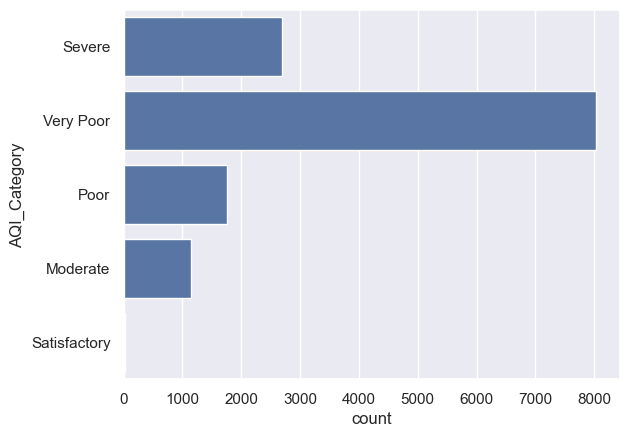

In [132]:
# countplot
sns.countplot(y='AQI_Category', data=aq_df)

In [133]:
# Calculate the correlation coefficients
plt.figure(figsize = [12, 5], facecolor = 'white')
sns.heatmap(aq_df.corr(), annot = True, linewidths = 2, cmap = "magma");

ValueError: could not convert string to float: 'AV-Delhi'

<Figure size 1200x500 with 0 Axes>

In [138]:
# copy dataset
air_new = aq_df.copy()
air_new.head()

,date,pm25,pm10,o3,no2,so2,co,city,latitude,longitude,year,aqi_pm10,aqi_no2,aqi_pm25,aqi_o3,aqi_so2,aqi_co,AQI,AQI_Category
3,2014-01-02,328.0,308.0,5.0,45.0,22.0,29.0,AV-Delhi,28.6508,77.3152,2014,258,56,478,5,28,371,478,Severe
4,2014-01-02,311.0,181.0,42.0,14.0,5.0,22.0,MM-Delhi,28.6341,77.2005,2014,154,18,461,42,6,330,461,Severe
5,2014-01-02,268.0,194.0,38.0,49.0,4.0,18.0,RKP-Delhi,28.5648,77.1744,2014,163,61,418,38,5,307,418,Severe
6,2014-01-03,266.0,253.0,37.0,63.0,7.0,29.0,RKP-Delhi,28.5648,77.1744,2014,203,79,416,37,9,371,416,Severe
7,2014-01-03,262.0,188.0,48.0,13.0,7.0,28.0,MM-Delhi,28.6341,77.2005,2014,159,16,412,48,9,365,412,Severe


In [139]:
# drop columns
air_new.drop(['city', 'year', 'date', 'AQI', 'pm10', 'latitude', 'longitude', 'aqi_co', 
              'aqi_o3', 'aqi_no2', 'aqi_so2', 'aqi_pm25', 'aqi_pm10' ],inplace=True, axis =1)

In [140]:
# view new cleaned dataset
air_new.head()

,pm25,o3,no2,so2,co,AQI_Category
3,328.0,5.0,45.0,22.0,29.0,Severe
4,311.0,42.0,14.0,5.0,22.0,Severe
5,268.0,38.0,49.0,4.0,18.0,Severe
6,266.0,37.0,63.0,7.0,29.0,Severe
7,262.0,48.0,13.0,7.0,28.0,Severe


# Column Transformer

In [141]:
# creating instances
ode =  OrdinalEncoder()
#scaler = MinMaxScaler()
scaler = PowerTransformer(method='yeo-johnson')

In [142]:
# column transformer
ct = make_column_transformer(
    (ode, ['AQI_Category']),
    (scaler, ['co', 'o3', 'no2', 'so2', 'pm25']),
    remainder= 'passthrough')


In [143]:
ct.set_output(transform="pandas")

ColumnTransformer(remainder='passthrough',
                  transformers=[('ordinalencoder', OrdinalEncoder(),
                                 ['AQI_Category']),
                                ('powertransformer', PowerTransformer(),
                                 ['co', 'o3', 'no2', 'so2', 'pm25'])])

In [144]:
# fit transform
air_new_df = ct.fit_transform(air_new)

In [145]:
# Get original column names
original_columns = ['AQI_Category', 'co', 'o3', 'no2', 'so2', 'pm25']


In [146]:
# Rename the columns in the resulting DataFrame
air_new_df.columns = original_columns

In [147]:
# view dataset
air_new_df

,AQI_Category,co,o3,no2,so2,pm25
3,3.0,1.662537,-1.448010,1.180813,2.132935,1.623045
4,3.0,1.176317,0.975438,-0.820734,-0.153471,1.490496
5,3.0,0.825880,0.847626,1.352617,-0.441711,1.125645
6,3.0,1.662537,0.813763,1.882103,0.311663,1.107501
7,3.0,1.600572,1.147734,-0.927094,0.311663,1.070865
...,...,...,...,...,...,...
15437,4.0,-0.551274,-1.908550,-0.196846,-1.816732,-0.499050
15438,4.0,1.400835,0.743468,-0.275753,-0.153471,0.840565
15439,4.0,-0.769316,0.420036,-0.196846,-0.787728,-0.402312
15440,4.0,0.726584,2.209925,0.695399,0.681349,-0.204293


In [148]:
# check unique values in AQI_category
air_new_df['AQI_Category'].value_counts()

AQI_Category
4.0    8030
3.0    2686
1.0    1760
0.0    1139
2.0      16
Name: count, dtype: int64

<Axes: xlabel='count', ylabel='AQI_Category'>

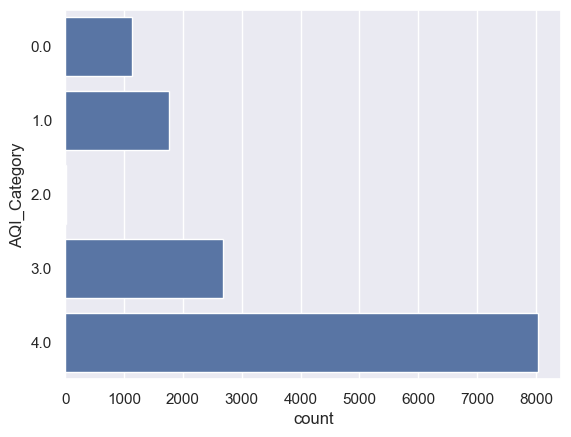

In [149]:
# countplot
sns.countplot(y='AQI_Category', data=air_new_df)

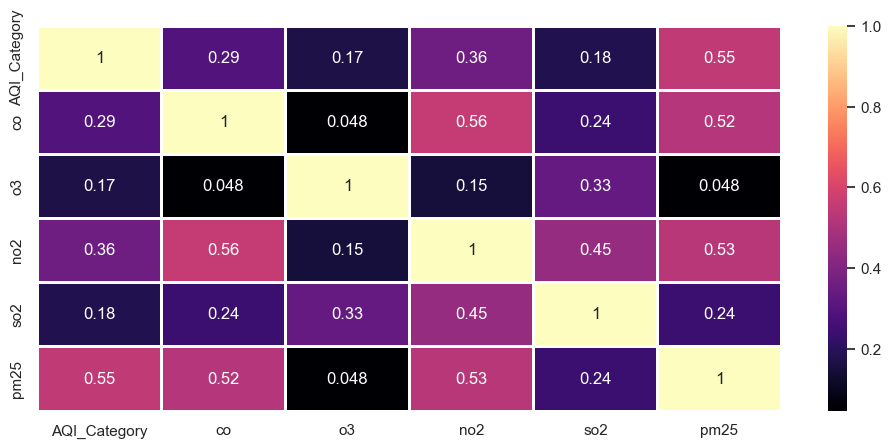

In [150]:
# Calculate the correlation coefficients
plt.figure(figsize = [12, 5], facecolor = 'white')
sns.heatmap(air_new_df.corr(), annot = True, linewidths = 2, cmap = "magma");

# Dataset split

In [151]:
# feature matrix and target variable
X =  air_new_df.drop(columns=['AQI_Category'])
y = air_new_df['AQI_Category']

In [152]:
# Split the data into training and testing sets (e.g., 80% training, 20% testing)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=123)

In [153]:
# Display the shapes of the resulting sets
print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)
print("y_train shape:", y_train.shape)
print("y_test shape:", y_test.shape)

X_train shape: (10904, 5)
X_test shape: (2727, 5)
y_train shape: (10904,)
y_test shape: (2727,)


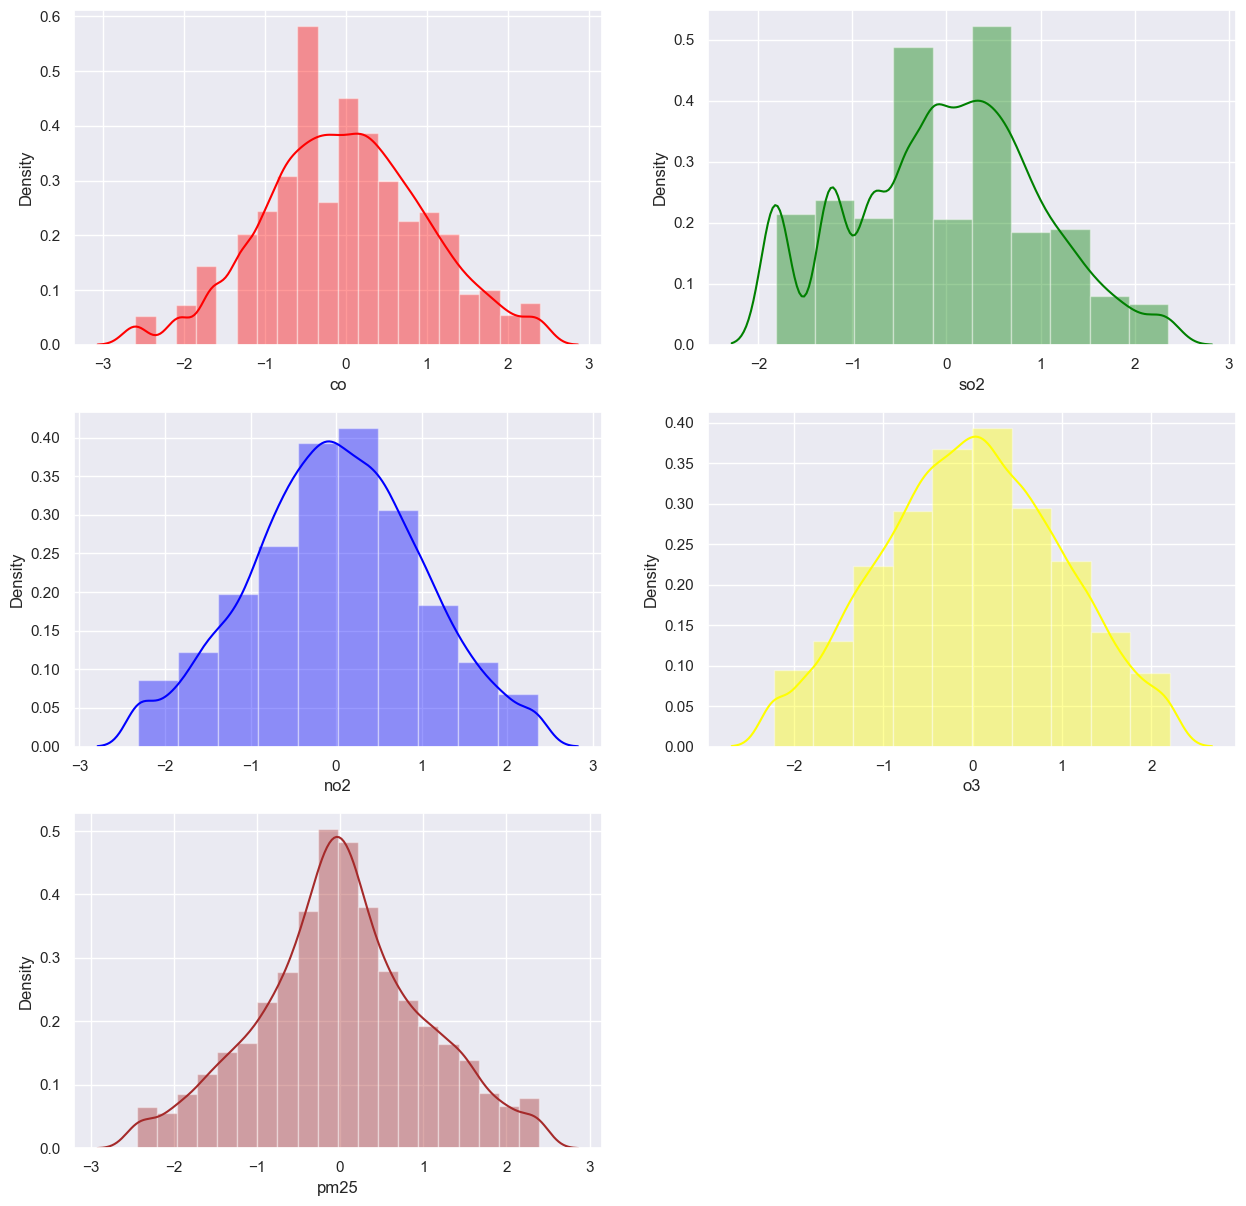

In [154]:
# To check the distribution of dataset
plt.figure(figsize=(15,20))
plt.subplot(4,2,1)
sns.distplot(X_train['co'],bins = 20,color = 'red')
plt.subplot(4,2,2)
sns.distplot(X_train['so2'],bins = 10,color = 'green')
plt.subplot(4,2,3)
sns.distplot(X_train['no2'],bins = 10,color = 'blue')
plt.subplot(4,2,4)
sns.distplot(X_train['o3'],bins = 10, color = 'yellow')
plt.subplot(4,2,5)
sns.distplot(X_train['pm25'],bins = 20,color = 'brown')
#plt.subplot(4,2,6)
#sns.distplot(X_train['pm10'],bins = 20,color = 'orange')
plt.show()

In [155]:
#X_train

# Get the feature names used during training
feature_names = X_train.columns
feature_names

Index(['co', 'o3', 'no2', 'so2', 'pm25'], dtype='object')

# Random Forest Classifier


In [156]:
# Use 'balanced' class weights in the classifier
rf_model = RandomForestClassifier()

# Train the classifier on the training set
rf_model.fit(X_train, y_train)

# Evaluate the accuracy of the classifier
rf_model.score(X_test, y_test)



0.9838650531719839

# Random Forest Random sampling

In [157]:
# Random Oversampling
rf_pipeline = make_pipeline(SMOTEENN(), rf_model)

# Step 3: Train your model using the training set with oversampling or undersampling
rf_pipeline.fit(X_train, y_train)

# Step 4: Make predictions on the test set
yrf_pred = rf_pipeline.predict(X_test)

# Step 5: Evaluate model performance
s_accuracy = accuracy_score(y_test, yrf_pred)
print(f"Model Accuracy: {s_accuracy}")

Model Accuracy: 0.9732306563989732


# Random Forest Learning Curve

In [158]:
# Create learning curve data
train_sizes, train_scores, test_scores = learning_curve(rf_pipeline, X, y,
                                                        cv=5,
                                                        train_sizes=np.linspace(0.1, 1.0, 10),
                                                        scoring='accuracy')

# Calculate mean and standard deviation for training and test scores
train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)

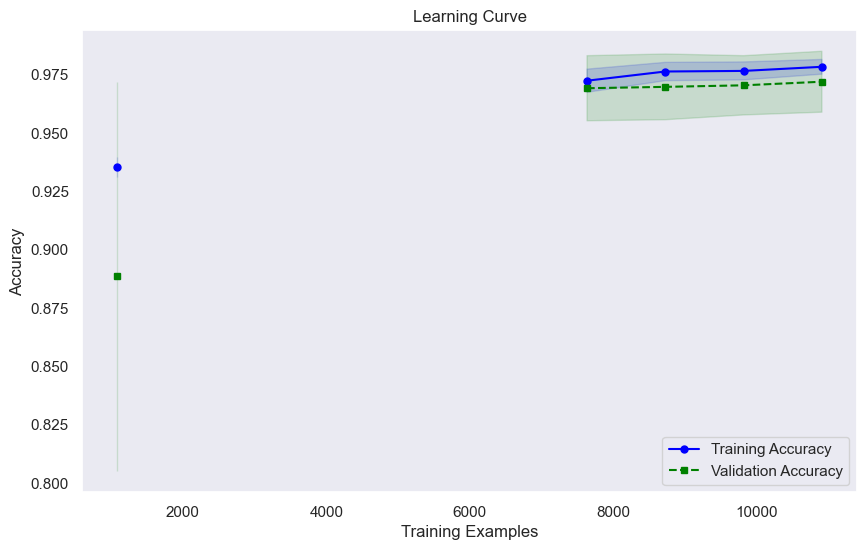

In [159]:
# Plot the learning curve
plt.figure(figsize=(10, 6))
plt.plot(train_sizes, train_mean, color='blue', marker='o', markersize=5, label='Training Accuracy')
plt.fill_between(train_sizes, train_mean - train_std, train_mean + train_std, alpha=0.15, color='blue')

plt.plot(train_sizes, test_mean, color='green', linestyle='--', marker='s', markersize=5, label='Validation Accuracy')
plt.fill_between(train_sizes, test_mean - test_std, test_mean + test_std, alpha=0.15, color='green')

plt.title('Learning Curve')
plt.xlabel('Training Examples')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')
plt.grid()
plt.show()

# SVM

In [160]:
# Create an SVM classifier with balanced class weights
svm_model = SVC(class_weight='balanced', probability=True)

# Train the classifier on the training set
svm_model.fit(X_train, y_train)

# Make predictions
svm_pred = svm_model.predict(X_test)

# Evaluate the model
print(classification_report(y_test, svm_pred))


              precision    recall  f1-score   support

         0.0       0.91      0.96      0.94       240
         1.0       0.79      0.94      0.86       342
         2.0       1.00      1.00      1.00         3
         3.0       0.87      0.93      0.90       510
         4.0       0.98      0.91      0.94      1632

    accuracy                           0.92      2727
   macro avg       0.91      0.95      0.93      2727
weighted avg       0.93      0.92      0.92      2727



In [192]:
svm_acc = accuracy_score(y_test, svm_pred)
print(f"Model Accuracy: {svm_acc}")

Model Accuracy: 0.9222588925559223


# SVM Random sampling

In [161]:
# Random Oversampling
svm_pipeline = make_pipeline(SMOTEENN(), svm_model)

# Step 3: Train your model using the training set with oversampling or undersampling
svm_pipeline.fit(X_train, y_train)

# Step 4: Make predictions on the test set
ysvm_pred = svm_pipeline.predict(X_test)

# Step 5: Evaluate model performance
svm_accuracy = accuracy_score(y_test, ysvm_pred)
print(f"Model Accuracy: {s_accuracy}")

Model Accuracy: 0.9732306563989732


# Gaussian Naive's Bayes

In [162]:
# Use 'balanced' class weights in the classifier
nb_model = GaussianNB()

# Train the classifier on the training set
nb_model.fit(X_train, y_train)

# Evaluate the accuracy of the classifier
nb_model.score(X_test, y_test)

0.8903557022368903

# Naive's Bayes (Gaussian) Random Sampling

In [163]:
# Random Oversampling
nb_pipeline = make_pipeline(SMOTEENN(), nb_model)

# Step 3: Train your model using the training set with oversampling or undersampling
nb_pipeline.fit(X_train, y_train)

# Step 4: Make predictions on the test set
ynb_pred = nb_pipeline.predict(X_test)

# Step 5: Evaluate model performance
nb_accuracy = accuracy_score(y_test, ynb_pred)
print(f"Model Accuracy: {s_accuracy}")

Model Accuracy: 0.9732306563989732


# KNN

In [164]:
# Use 'balanced' class weights in the classifier
knn_model = KNeighborsClassifier(n_neighbors=6)

# Train the classifier on the training set
knn_model.fit(X_train, y_train)

# Evaluate the accuracy of the classifier
knn_model.score(X_test, y_test)

0.9108910891089109

# KNN Random Sampling

In [165]:
# Random Oversampling
knn_pipeline = make_pipeline(SMOTEENN(), knn_model)

# Step 3: Train your model using the training set with oversampling or undersampling
knn_pipeline.fit(X_train, y_train)

# Step 4: Make predictions on the test set
yknn_pred = knn_pipeline.predict(X_test)

# Step 5: Evaluate model performance
knn_accuracy = accuracy_score(y_test, yknn_pred)
print(f"Model Accuracy: {knn_accuracy}")

Model Accuracy: 0.8503850385038504


# MLP Classifier

In [166]:
# Use 'balanced' class weights in the classifier
mlp_model = MLPClassifier(hidden_layer_sizes=(100,), max_iter=1000, random_state=123)

# Train the classifier on the training set
mlp_model.fit(X_train, y_train)

# Evaluate the accuracy of the classifier
mlp_model.score(X_test, y_test)

0.9790979097909791

# MLP Random Sampling

In [167]:
# Random Oversampling
mlp_pipeline = make_pipeline(SMOTEENN(), mlp_model)

# Step 3: Train your model using the training set with oversampling or undersampling
mlp_pipeline.fit(X_train, y_train)

# Step 4: Make predictions on the test set
ymlp_pred = mlp_pipeline.predict(X_test)

# Step 5: Evaluate model performance
mlp_accuracy = accuracy_score(y_test, ymlp_pred)
print(f"Model Accuracy: {mlp_accuracy}")

Model Accuracy: 0.9611294462779612


#  Ensemble - Voting Classifier

In [168]:
# Create a Voting Classifier with the individual classifiers as meta classifier
v_clf = VotingClassifier(estimators=[('rf', rf_pipeline),
                                     ('svm', svm_pipeline),
                                     ('nb', nb_pipeline),
                                     ('knn', knn_pipeline),
                                     ('mlp',mlp_pipeline)])

# Train the classifier on the training set
v_clf.fit(X_train, y_train)

# Evaluate the accuracy of the classifier
v_clf.score(X_test, y_test)

0.9354602126879354

# Cross Validation

In [169]:
# Perform cross-validation
v_cv_scores = cross_val_score(v_clf, X_train, y_train, cv=5)  # 5-fold cross-validation

print(f'Cross-Validation Scores: {v_cv_scores}')
print(f'Mean CV Score: {v_cv_scores.mean()}')

Cross-Validation Scores: [0.92984869 0.92067859 0.92342962 0.93214122 0.92293578]
Mean CV Score: 0.9258067799889791


In [170]:
# calculate precision scores
precision_scores = cross_val_score(v_clf, X_train, y_train, cv=5,
                                   scoring='precision_macro')
print("Precision Scores:", precision_scores, "\n")
print("Mean Precision:", precision_scores.mean())

Precision Scores: [0.83018624 0.92231028 0.92234359 0.8827444  0.8615856 ] 

Mean Precision: 0.8838340216786331


In [171]:
# calculate recall scores
recall_scores = cross_val_score(v_clf, X_train, y_train, cv=5,
                                   scoring='recall_macro')
print("Recall Scores:", recall_scores, "\n")
print("Mean Recall:", recall_scores.mean())

Recall Scores: [0.95915528 0.9541222  0.89586269 0.95607149 0.95681118] 

Mean Recall: 0.9444045659223171


In [172]:
# calculate f1 scores
f1_scores = cross_val_score(v_clf, X_train, y_train, cv=5,
                                   scoring='f1_macro')
print("F1 Scores:", f1_scores, "\n")
print("Mean F1:", f1_scores.mean())

F1 Scores: [0.84085313 0.9368698  0.90002132 0.89425218 0.9006336 ] 

Mean F1: 0.8945260051446778


In [173]:
# calculate acc scores
acc_scores = cross_val_score(v_clf, X_train, y_train, cv=5,
                                   scoring='accuracy')
print("F1 Scores:", acc_scores, "\n")
print("Mean F1:", acc_scores.mean())

F1 Scores: [0.9303072  0.92067859 0.92297111 0.92939019 0.92385321] 

Mean F1: 0.9254400599001384


Confusion Matrix:
[[ 234    6    0    0    0]
 [   3  339    0    0    0]
 [   1    0    2    0    0]
 [   0    1    0  477   32]
 [   2   63    0   68 1499]]


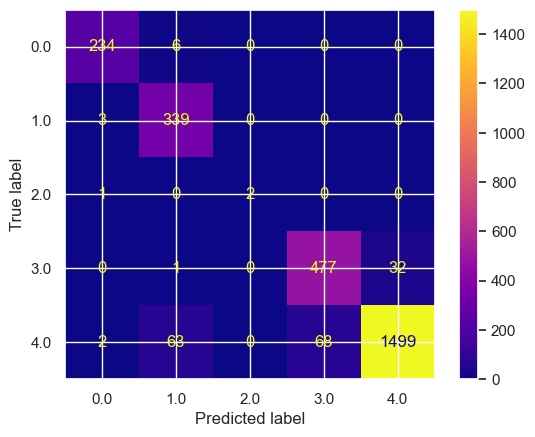

In [174]:
# Make predictions
vot_pred = v_clf.predict(X_test)

# Evaluate the model
vot_conf_mat = confusion_matrix(y_test, vot_pred, labels= v_clf.classes_)
print("Confusion Matrix:")
print(vot_conf_mat)

# display confusion matrix
vot_disp = ConfusionMatrixDisplay(confusion_matrix = vot_conf_mat,
                                 display_labels = v_clf.classes_
                                 )
#vot_disp.plot()
vot_disp.plot(cmap=plt.cm.plasma)
plt.show()

In [175]:
# Apply SMOTE to oversample the minority classes
smote = SMOTE(sampling_strategy='auto',  k_neighbors=5, random_state=42)
X_resampled, y_resampled = smote.fit_resample(X_train, y_train)

# Train a classifier (Random Forest as an example)
clf = RandomForestClassifier(random_state=42)
clf.fit(X_resampled, y_resampled)

# Make predictions and evaluate
y_pred = clf.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

         0.0       0.99      1.00      0.99       240
         1.0       1.00      1.00      1.00       342
         2.0       1.00      0.67      0.80         3
         3.0       0.99      0.93      0.96       510
         4.0       0.98      0.99      0.99      1632

    accuracy                           0.98      2727
   macro avg       0.99      0.92      0.95      2727
weighted avg       0.98      0.98      0.98      2727



# Stacking Ensemble

In [176]:
# Create a stacking classifier with base and meta classifiers
st_model = StackingClassifier(estimators=[('rf', rf_model),
                                     ('svm', svm_model),
                                     ('nb', nb_model),
                                     ('knn', knn_model),
                                     ('mlp',mlp_model)], final_estimator=MLPClassifier())
# Train the classifier on the training set
st_model.fit(X_train, y_train)
# Evaluate the accuracy of the classifier
st_model.score(X_test, y_test)

0.984965163182985

# Stacking Ensemble Random Sampling Models

In [177]:
# Create a stacking classifier with base and meta classifiers
model_st = StackingClassifier(estimators=[('rf', rf_pipeline),
                                     ('svm', svm_pipeline),
                                     ('nb', nb_pipeline),
                                     ('knn', knn_pipeline),
                                     ('mlp',mlp_pipeline)], final_estimator=MLPClassifier())
# Train the classifier on the training set
model_st.fit(X_train, y_train)
# Evaluate the accuracy of the classifier
model_st.score(X_test, y_test)

0.980931426475981

# Model Evaluation

In [178]:
#predict
st_pred = model_st.predict(X_test)
st_pred

array([1., 0., 3., ..., 4., 3., 4.])

In [179]:
# probability
st_proba = model_st.predict_proba(X_test)
st_proba

array([[1.08719542e-06, 9.99542014e-01, 3.99048350e-05, 6.75937052e-07,
        4.16317923e-04],
       [9.96550658e-01, 7.86189415e-04, 2.24465521e-06, 6.85711542e-09,
        2.66090147e-03],
       [2.18596663e-07, 5.89413571e-08, 6.09230302e-08, 9.99152506e-01,
        8.47155739e-04],
       ...,
       [6.31297552e-08, 1.39141486e-07, 3.29533480e-07, 2.51373366e-02,
        9.74862132e-01],
       [2.36317288e-07, 6.55167596e-08, 5.28666649e-08, 9.99542589e-01,
        4.57055804e-04],
       [4.12544517e-07, 3.01836213e-06, 7.39561154e-07, 1.17069776e-02,
        9.88288852e-01]])

In [180]:
# Confusion Matrix
conf_mat = confusion_matrix(y_test, st_pred, labels = model_st.classes_)
print("Confusion Matrix:")
print(conf_mat)

Confusion Matrix:
[[ 240    0    0    0    0]
 [   0  342    0    0    0]
 [   0    0    3    0    0]
 [   0    1    0  467   42]
 [   2    0    0    7 1623]]


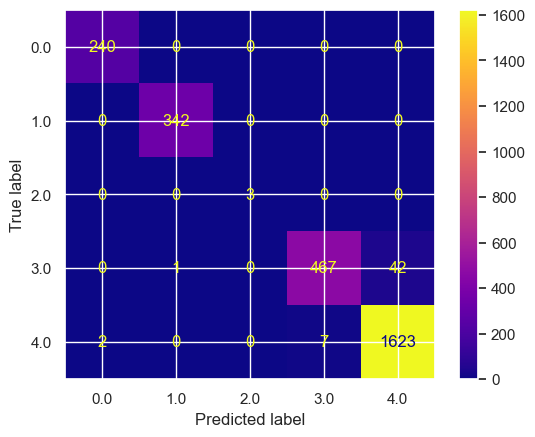

In [181]:
# display confusion matrix
st_disp = ConfusionMatrixDisplay(confusion_matrix = conf_mat,
                                 display_labels = model_st.classes_)
st_disp.plot(cmap=plt.cm.plasma)
#st_disp.plot()
plt.show()

In [182]:
# Accuracy Score
stacking_accuracy = accuracy_score(y_test, st_pred)
print("Accuracy Score:", stacking_accuracy)

Accuracy Score: 0.980931426475981


In [183]:
# ROC-AUC Score
roc_auc = roc_auc_score(y_test, st_proba, multi_class='ovr')
print("ROC-AUC Score:", roc_auc)

ROC-AUC Score: 0.9945630525562871


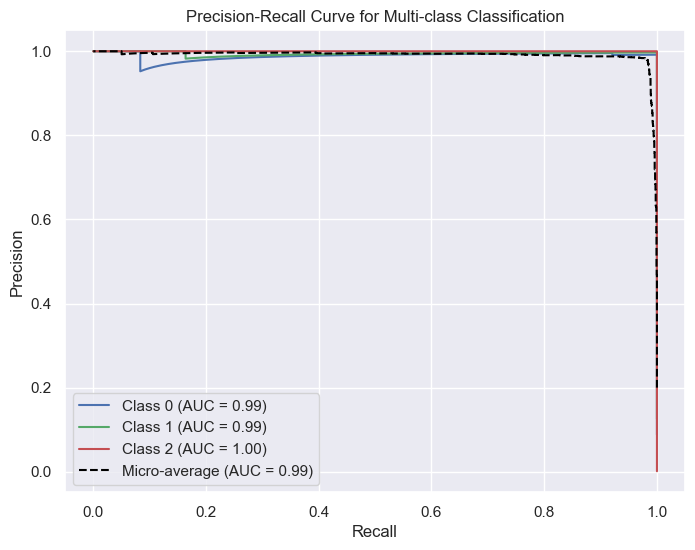

In [184]:
# Precision Recall Curve
from sklearn.preprocessing import label_binarize
# Convert the target variable to a binary format
y_binary = label_binarize(y_test, classes=[0, 1, 2, 3, 4])  # Adjust the classes based on your actual data
# Initialize variables for precision-recall
precision = dict()
recall = dict()
average_precision = dict()

# Calculate precision and recall for each class
for i in range(y_binary.shape[1]):
    precision[i], recall[i], _ = precision_recall_curve(y_binary[:, i], st_proba[:, i])
    average_precision[i] = auc(recall[i], precision[i])

# Compute micro-average precision-recall curve and area the curve
precision["micro"], recall["micro"], _ = precision_recall_curve(y_binary.ravel(), st_proba.ravel())
average_precision["micro"] = auc(recall["micro"], precision["micro"])

# Plot the Precision-Recall curves for each class
plt.figure(figsize=(8, 6))
colors = ['b', 'g', 'r']  # Adjust the colors based on the number of classes

for i, color in zip(range(y_binary.shape[1]), colors):
    plt.plot(recall[i], precision[i], color=color, label=f'Class {i} (AUC = {average_precision[i]:.2f})')

# Plot the micro-average Precision-Recall curve
plt.plot(recall["micro"], precision["micro"], label=f'Micro-average (AUC = {average_precision["micro"]:.2f})', linestyle='--', color='black')

plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve for Multi-class Classification')
plt.legend()
plt.show()

# Cross Validation for Stacking Ensemble

In [185]:
# Perform cross-validation
st_cv_scores = cross_val_score(model_st, X_train, y_train, cv=5)  # 5-fold cross-validation

print(f'Cross-Validation Scores: {st_cv_scores}')
print(f'Mean CV Score: {st_cv_scores.mean()}')

Cross-Validation Scores: [0.97890876 0.98028427 0.97890876 0.98441082 0.9766055 ]
Mean CV Score: 0.9798236226964316


In [186]:
# calculate precision scores
st_precision_scores = cross_val_score(model_st, X_train, y_train, cv=5,
                                   scoring='precision_macro')
print("Precision Scores:", st_precision_scores, "\n")
print("Mean Precision:", st_precision_scores.mean())


Precision Scores: [0.99052348 0.98873728 0.98706177 0.99225036 0.98897588] 

Mean Precision: 0.9895097554258768


In [187]:
# calculate recall scores
st_recall_scores = cross_val_score(model_st, X_train, y_train, cv=5,
                                scoring='recall_macro')
print("Recall Scores:", st_recall_scores, "\n")
print("Mean Recall:", st_recall_scores.mean())

Recall Scores: [0.97974318 0.98357759 0.98042475 0.98498755 0.98127776] 

Mean Recall: 0.982002165264156


In [188]:
# calculate f1 scores
st_f1_scores = cross_val_score(model_st, X_train, y_train, cv=5,
                            scoring='f1_macro')
print("F1 Scores:", st_f1_scores, "\n")
print("Mean F1:", st_f1_scores.mean())

F1 Scores: [0.98591231 0.986289   0.98310314 0.98754334 0.98520946] 

Mean F1: 0.9856114492395356


In [189]:
# calculate f1 scores
st_acc_scores = cross_val_score(model_st, X_train, y_train, cv=5,
                             scoring='accuracy')


In [190]:
print("Accuracy Scores:", st_acc_scores, "\n")
print("Mean Accuracy:", st_acc_scores.mean())

Accuracy Scores: [0.97936726 0.98165979 0.97753324 0.9825768  0.97798165] 

Mean Accuracy: 0.9798237488905434
